# Import Dependencies and Pre-trained Model

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Preprocess and Load Image

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [4]:
content_img = load_image('profile.jfif')
style_img = load_image('monet.jpeg')

# Visualization of Image

In [6]:
content_img.shape

TensorShape([1, 200, 200, 3])

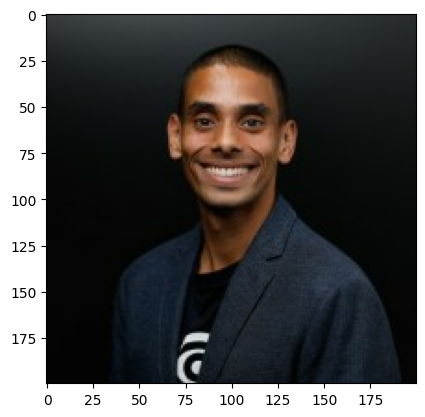

In [7]:
plt.imshow(np.squeeze(content_img))
plt.show()

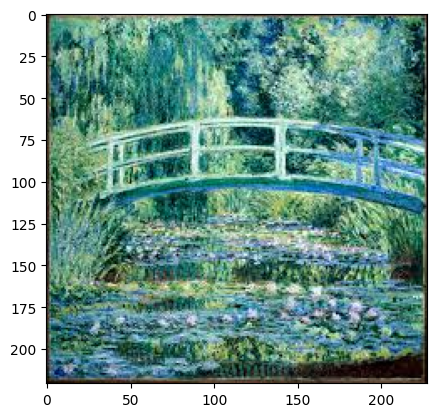

In [8]:
plt.imshow(np.squeeze(style_img))
plt.show()

# Stylize Image

In [9]:
stylized_img = model(tf.constant(content_img), tf.constant(style_img))[0]

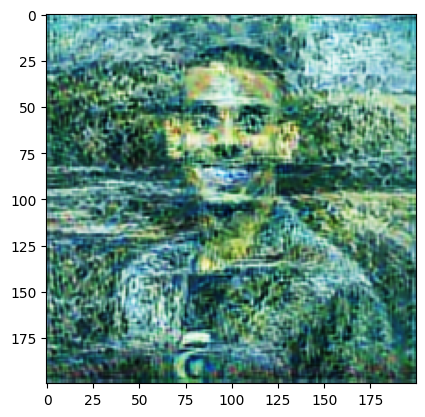

In [10]:
plt.imshow(np.squeeze(stylized_img))
plt.show()

# Export Image

In [11]:
cv2.imwrite('Output_img.jpg', cv2.cvtColor(np.squeeze(stylized_img)*255, cv2.COLOR_BGR2RGB))

True